# Simulating A Dataset

## Project 2019 - Programming for Data Analysis

## 1. Introduction

The objective of this project is to simulate a dataset. I decided to model my dataset on a real life scenario taken from the IT Industry. I chose to create a dataset of Installed Base data, which I hope to use at a later stage, to develop and test Machine Learning algorithms such as linear regression and classification. 


### 1.1 Why Simulate Datasets

Brownlee (2018) suggests that one of the main reasons for simulating a dataset is to test a machine learning algorithm. Ziganto (2018) makes the point that using your own test dataset helps improve your understanding of the strengths and weaknesses of different machine learning algorithms. It can also be much quicker and less expensive to mock up a dataset than to go out and collect the data by conducting real world experiments. 

### 1.2 How to Simulate A Dataset

There are a number of Python packages which can be used to simulate datasets. The two main packages are NumPy Random and Scikit-Learn's datasets module. There are other modules which can also be used to synthesise data with spefic features, such as UUID module. 

* NumPy Random Package: McLoughlin (2019) describes the numpy.random package as a sub-package of the NumPy package in Python. The package contains algorithms to generate pseudo-random numbers (Sharpsight, 2019). According to The SciPy community (2019), the numpy.random package generates pseudo-random numbers using a combination of a bit generator and a random generator. The bit generator creates sequences of values and the random generator transforms these sequences into statistical distributions.
* Sklearn.datasets module: Scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.
* UUID module: The UUID module provides "immutable UUID objects (the UUID class) and the functions uuid1(), uuid3(), uuid4(), uuid5() for generating version 1, 3, 4, and 5 UUIDs as specified in RFC 4122" (The Python Foundation, 2019).

I used NumPy Random Package and the UUID module to create my dataset


### 1.3 What is Installed Base Data and Who Uses it?

According to Kurvinen (2017), the typical data on install base includes a listing of products which are installed at a given customer site. Futhermore, it can include additional variables such as serial numbers, hardware and software revisions, warranty and service contracts. 

Installed base data can be used by many departments in an organisation, from field service engineers, sales, spare parts planners, quality etc . The dataset helps to answer questions such as:

* What is the current configuration of the product to be serviced?
* Where is the faulty product physically located and where is the part to be replaced located?
* Is the unit covered under warranty or service contract?
* When was the unit installed, upgraded and/or last serviced?

![Install Base Image](https://cdn.myonlinestore.eu/945f2dab-6be1-11e9-a722-44a8421b9960/images/World%20map%20installed%20base.png)

## 2. Basic Description of the Dataset

The dataset contains 200 rows and 8 columns.

The 8 columns contain the following fields:

1. Part Number: 5 Digit identifier for each product installed. 
2. Serial Numbers: Unique ID's for each unit sold. 
3. Install Date: The start-up / installation date recorded by the field service engineer. The date range is: January 2017 to December 2019 (36 months)
4. Factory Warranty Expiration Date: Factory Warranty expires 3 year after installation date.
5. Extended Warranty: Number of years of extended warranty cover purchased.
6. Customer ID Number: 5 Digit identifier for each customer.
7. Country: ISO 2 Digit Country Code, identifying the country where the product is installed.
8. Service Contract: Record of whether the customer has taken out a service contract on the hardware.

### 2.1 Features

The dataset contains a mixture of continous, numerical and categorical variables.

* Continuous Variables

According to Minitab (2019) continuous variables are variables that have "an infinite number of values between any two values" They are usually measured on a scale such as weight, height, temperature,date or time. The continuous variables in my dataset are; Installation Date & Factory Warranty Date.

* Discrete Variables

Discrete variables are numeric variables that are countable, e.g. number of defects or customer complaints (Minitab, 2019).The discrete variables in my dataset are; Serial Number, Customer ID, Part Number, Extended Warranty

* Categorical Variables

Sarkar (2018) describes categorical data as data that can be grouped into a finite set of categories or classes. The data can be text or numeric. Categorical variables can be grouped into two types, ordinal and nominal data types. Nominal data, is data that doenst have a logical order. Whereas ordinal data can be ranked in a given order. The categorical variables in my dataset are; Country & Service Contract (both nominal data types).


### 2.2 Variables Types

The dataset contains the following variable types.
 
 1. Python Objects: This dtype is used to store string variables; Serial Number, Country and Service Contract.
 
 2. datetime64: Datetime64 is a NumPy data types which support datetime functionality (The Scipy Community, 2017). This datatype will be used to store datetime variables 'install date' & 'factory warranty'.
 
 3. Int32: This datatype is a 32bit integer, which will be used for variables; part number, customer id and extended warranty. 

## 3. Generate Data

### 3.1 Getting Started

I begin by importing all the necessary dependencies and defining some common parameters mentioned above (200 serial number, 36 months, starting month in January 2017).

In [95]:
# importing all the libraries
import pandas as pd
import numpy as np
import uuid
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import scipy.stats as ss

In [96]:
# Define the parameters dataset; 200 serial numbers, 36 months, starting month in January 2017).

# number of serial numbers which are contained in the install base dataset
num_serial_num = 200

# number of months since first unit was installed
num_months = 36

# starting month when units first installed
start_month = '2017-01-01'

### 3.2 Create Part Numbers

Part numbers can be classified as a discrete variable. I generated the part numbers using the NumPy Random Randint Function. 
The numpy.random.randint() function returns random integers taken from a specified range in a discrete uniform distribution (Onlinecoursetutorials.com, 2019). 

#### Features of Part Number Variable

* Description: Part Number is a 5 Digit numeric code which identifies each product.
* Distribution: Discrete Uniform Distribution is appropriate as there is typically a finite list of part numbers and each part number has the same probability of being chosen.
* Relationship with other variables: None.
* Datatype: Int32

In [97]:
# Use NumPy Random Randint Function to generate 200 random part numbers

# 5 Digit Part Numbers with ID # in range of 10000 to 99999
low, high, size = (10000 , 99999 , 200) # Define parameters for numpy.random.randint() function

np.random.seed(2) # use random seed generator

# Create a Pandas Dataframe - # solution adapted from https://stackoverflow.com/a/23671779
# Create 2D array of 200 sets of 5 numbers
parts = pd.DataFrame(np.random.randint(low, high, size), columns=['parts'])
# Display first 5 rows
parts.head()

,parts
0,99256
1,82173
2,54566
3,41019
4,94434


C:\Users\SESA87346\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Part Numbers')

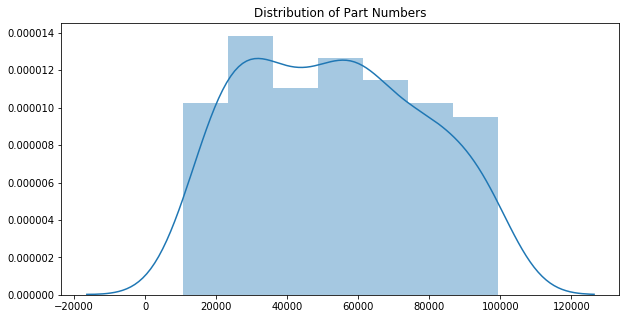

In [98]:
# Create a figure to visualize the distribution
plt.subplots(figsize=(10,5))

# Plot histogram of dataframe using seaborn distplot function
sns.distplot(pd.DataFrame(parts)).set_title('Distribution of Part Numbers')

### 3.3 Create Serial Numbers

Serial numbers can be classified as a discrete variable. I generated the the serial numbers using Python's UUID module. 

Serial numbers are usually unique alphanumeric strings, usually of a fixed length, so I decided to use UUID function in python to generate random unique ID's which have similar properties to serial numbers. The UUID module provides "immutable UUID objects (the UUID class) and the functions uuid1(), uuid3(), uuid4(), uuid5() for generating version 1, 3, 4, and 5 UUIDs as specified in RFC 4122" (The Python Foundation, 2019).
UUID is a Universally Unique Identifier, a 128-bit sequence (str of length 32) designed to “guarantee uniqueness across space and time.” 

#### Features

* Description: Serial Number is a unique alphanumeric string, with a string length of 32 characters.
* Distribution: None - each serial number is unique.
* Relationship with other variables: None.
* Datatype: Python Object 

In [99]:
# Generate 200 serial numbers using UUID function
# Adapted from https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d

# create an 1D array called serial, using uuid4 function to generate 200 random UUID. 
serial = pd.Series([str(uuid.uuid4()) for i in range(0,num_serial_num)])
# create 2D dataframe called installbase and insert array serial
installbase = pd.DataFrame()
# insert array serial into installbase dataframe
installbase['serial number'] = pd.Series(serial)
# display dataframe (scrolling)
installbase
# displays 200 rows x 1 column labelled serial number

,serial number
0,ad882c66-9c55-49dd-bed1-c34b90e86291
1,ac6d5035-90f8-4594-8ba8-939c1373b6a4
2,a29df664-590b-4793-8979-89b4fe30b2d5
3,d643eb90-e293-4cc8-9acf-e469158fab22
4,cfb26f34-5d12-40b7-aa3f-7509dab2dc71
5,dd93c9a0-d46f-4b1b-b681-0ce68fb9f4ee
6,1d9e6eea-230f-4f6d-9700-17bae1dae529
7,ae45ce3d-0c06-463d-88ab-9feebf20d5b4
8,01496eac-322d-42db-9217-822058c741b0
9,9eb48e43-ce67-468f-b027-979ee480a13e


In [100]:
# Adding part number column to the dataframe using pandas concat function
# Adapted from https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d

# Combine 2 pandas series in the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['part number'] = pd.concat([parts], axis=0).reset_index().drop('index', 1)
# display 5 sample rows
installbase.sample(5)

,serial number,part number
55,9b77e9b3-3209-4011-8195-a305cb1745ff,55856
70,96a13a0c-8710-484b-9e4d-1bba49a0720f,13538
158,0aabc4e2-98a2-42c4-81ce-5113bb64548c,27769
179,d5dcf3cc-e566-4230-9981-8fcbb5264c0b,37016
123,7856c94a-eb45-44a7-a012-15037c788af6,24073


The output is a dataframe 200 rows and two columns, serial number and part number. 

### 3.4 Generating Install Date

Install Date can be classified as a continuous variable. To generate random install date data, I had to use a two step process. For the first step, I used the pandas.to_datetime function to output a range of datetime values, grouped into 36 months, between January 2017 and December 2019. For the next step, I selected a random sample of these dates to populate the dataset using np.random.choice function. The numpy.random.choice() function returns random numbers from a given sequence of numbers (Onlinecoursetutorials.com, 2019).

#### Features

* Description: The start-up / installation date recorded by the field service engineer. The date range is: January 2017 to December 2019 (36 months)
* Distribution: Uniform continuous distribution also know as rectangular distribution, which is a probability distribution where all outcomes are equally likely to occur; each trial has the same probability of success, Chen (2019).
* Relationship with other variables: There is a link to the Serial Number and factory warranty.
* Datatype: datetime64

In [101]:
# Step 1: Create Date Range using the specified parameters (starting month, number of months).
# Adapted from https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d

# reseting the index without inserting it as a column in the new DataFrame - https://www.geeksforgeeks.org/python-pandas-series-reset_index/
installbase = installbase.reset_index().drop('index', 1)

# defining range of installation dates: starting month 
start_month_ts = pd.to_datetime(start_month)
# define end month as start month plus 36 months, using relativedata utility https://dateutil.readthedocs.io/en/stable/relativedelta.html
end_month_ts = start_month_ts + relativedelta(months=+num_months - 1)

# making a Series out of the starting and ending month
months = pd.Series(pd.date_range(start_month_ts, end_month_ts, freq='MS'))
# Display start and end month
str(start_month_ts), str(end_month_ts)

('2017-01-01 00:00:00', '2019-12-01 00:00:00')

This argument uses the specified parameters (starting month, number of months) to generate a range of dates from January 2017 to December 2019.

In [102]:
# Step 2: Select random installation dates from range of dates created above

# use random seed generator
np.random.seed(2) # use random seed generator
# create a series called installdate whoch contain 200 dates chosen at random from  the daterange "months" using random.choice() function 
installdate = pd.Series(np.random.choice(months, size=num_serial_num))
# display first 5 rows
installdate.head()

0   2018-04-01
1   2017-09-01
2   2018-11-01
3   2018-07-01
4   2017-12-01
dtype: datetime64[ns]

In [103]:
#  Adding installdate column to the dataframe

# Combine installdate series into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['install date'] = pd.concat([installdate] * num_serial_num, axis=0).reset_index().drop('index', 1)
#diplay the first five rows of the updated dataframe
installbase.head()

,serial number,part number,install date
0,ad882c66-9c55-49dd-bed1-c34b90e86291,99256,2018-04-01
1,ac6d5035-90f8-4594-8ba8-939c1373b6a4,82173,2017-09-01
2,a29df664-590b-4793-8979-89b4fe30b2d5,54566,2018-11-01
3,d643eb90-e293-4cc8-9acf-e469158fab22,41019,2018-07-01
4,cfb26f34-5d12-40b7-aa3f-7509dab2dc71,94434,2017-12-01


(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]), <a list of 10 Text xticklabel objects>)

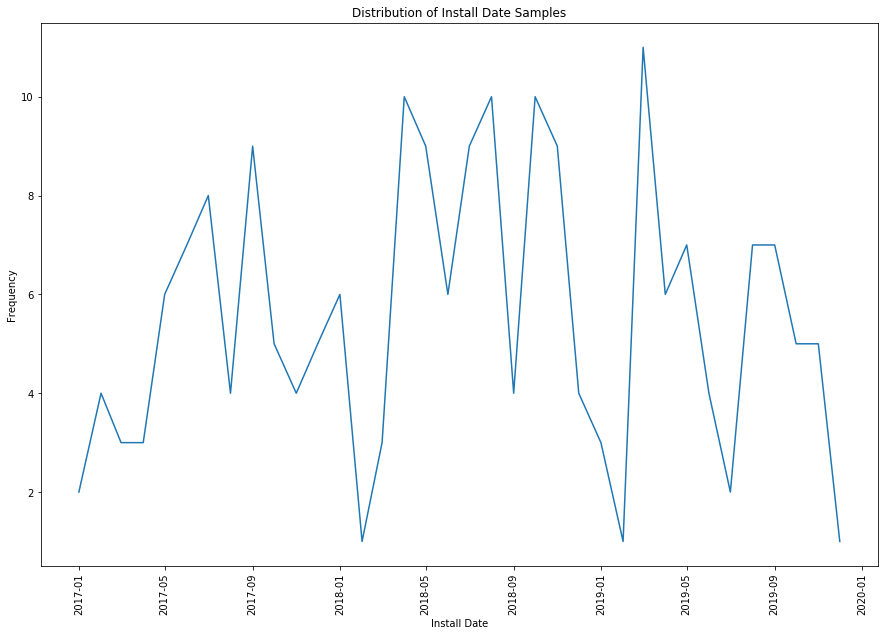

In [104]:
# Visualize the distribution of install date values

# use groupby function to group count of install date by date and store this value in new dataframe df
df = installbase.groupby(['install date']).count() # Adapted from McKinney 2019

# Resize Plot to creates a figure with 15 (width) x 10 (height) inches - Adapted from https://stackoverflow.com/a/36368418
plt.figure(figsize=(15,10))

# Create labels for x 7 y axis and add title
plt.title('Distribution of Install Date Samples') # Plot Title
plt.xlabel('Install Date') # Label x Axis 
plt.ylabel('Frequency') # Label y Axis 

# display plot
plt.plot(df['serial number'])
# Rotate the values on x axis to vertical, so values dont overlap
plt.xticks(rotation='vertical')

### 3.5 Generate Factory Warranty Data

Factory warranty expiration date (shortened to 'factory warranty') is continuous datetime variable and has a relationship with install date. The majority of IT manufacturers provide a 3 year warranty, for example APC by Schneider Elctric. Normally the factory warranty is activated from the installation date of the hardware. 

NumPy Datetimes and Timedeltas functions enable basic datetime calculations (The SciPY Community, 2017). I used the pandas Datetime and Timedelta functions to add 3 years to install date using Timedelta units (‘Y’, years)=3 to create factorywarrantyexpiry date.

#### Features

* Description: Factory warranty is defined as the date the factory warranty expires. It is calculated as 3 years from the installation date of the unit.
* Distribution: Same as install date. Uniform continuous distribution also know as rectangular distribution, which is a probability distribution where all outcomes are equally likely to occur; each trial has the same probability of success, Chen (2019).
* Relationship with other variables: Install Date.
* Datatype: datetime64

In [105]:
# Generate factory warranty expiry date
# Adapted from https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html
# Add 3 years to install date using Timedelta units (‘Y’, years)=3 to create factorywarrantyexpiry date.
factorywarrantyexpiry = (installdate + np.timedelta64(3, 'Y'))
# Display array (scrolling)
factorywarrantyexpiry

0     2021-03-31 17:27:36
1     2020-08-31 17:27:36
2     2021-10-31 17:27:36
3     2021-06-30 17:27:36
4     2020-11-30 17:27:36
5     2020-07-31 17:27:36
6     2022-10-31 17:27:36
7     2022-07-31 17:27:36
8     2020-11-30 17:27:36
9     2021-09-30 17:27:36
10    2022-07-31 17:27:36
11    2022-02-28 17:27:36
12    2021-08-31 17:27:36
13    2020-03-31 17:27:36
14    2020-04-30 17:27:36
15    2022-09-30 17:27:36
16    2020-03-31 17:27:36
17    2020-05-31 17:27:36
18    2021-12-31 17:27:36
19    2020-04-30 17:27:36
20    2020-06-30 17:27:36
21    2022-07-31 17:27:36
22    2021-07-31 17:27:36
23    2022-07-31 17:27:36
24    2020-02-29 17:27:36
25    2021-04-30 17:27:36
26    2020-12-31 17:27:36
27    2020-04-30 17:27:36
28    2022-02-28 17:27:36
29    2021-03-31 17:27:36
              ...        
170   2021-09-30 17:27:36
171   2021-07-31 17:27:36
172   2020-04-30 17:27:36
173   2022-10-31 17:27:36
174   2020-12-31 17:27:36
175   2021-03-31 17:27:36
176   2021-09-30 17:27:36
177   2020-0

In [106]:
#  Add factory warranty to the dataframe

# Combine factory warranty into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['factory warranty'] = pd.concat([factorywarrantyexpiry], axis=0).reset_index().drop('index', 1)
# Display the last five rows of the revised dataframe
installbase.tail()

,serial number,part number,install date,factory warranty
195,3fbcbc27-0e14-4507-a9af-d54a6a4968b7,73708,2018-12-01,2021-11-30 17:27:36
196,b8ac31fd-ee62-402e-83ac-8dfb37d03b34,43158,2019-04-01,2022-03-31 17:27:36
197,83f25ad7-89a7-4341-854f-eedd67cd958e,50561,2018-05-01,2021-04-30 17:27:36
198,5680dcff-bec4-438f-83c9-d5ed5d236d72,53052,2017-05-01,2020-04-30 17:27:36
199,0cbc5bae-7d82-4ec8-af60-2f83cc55f520,16661,2018-01-01,2020-12-31 17:27:36


### 3.5 Create Extended Warranty Data

Customers have the option of purchasing extended warranty. This involves extending the 3 year factory warranty by a further 1, 2 or 3 years. I generated the extended warranty data using the NumPy Random Randint Function. The numpy.random.randint() function returns random integers taken from a specified range in a discrete uniform distribution (Onlinecoursetutorials.com, 2019).

#### Features

* Description: Factory warranty is defined as the date the factory warranty expires. It is calculated as 3 years from the installation date of the unit.
* Distribution: discrete uniform distribution.
* Relationship with other variables: None.
* Datatype: Int32
* Values: [(0=No), (1=1 Year Extended Warranty), (2=2 Year Extended Warranty), (3=3 Year Extended Warranty)]

In [107]:
# Generate warranty data
# Define parameters
choices = 4  # 4 choices, ie 0,1,2 or 3 Years extended

# create new series call warranty
warranty = pd.DataFrame()

np.random.seed(2) # use random seed generator
# generate 1d array called warranty consisting of 200 rows, with values 0 to 3 random selected from a uniform distribution
warranty['extended warranty'] = np.random.randint(low=0, high=choices, size=num_serial_num)
# display sample of 5 rows
warranty.sample(5)

,extended warranty
126,3
146,3
174,2
137,2
7,3


In [108]:
#  Adding extended warranty column to the dataframe

# Combine warranty series into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['extended warranty'] = pd.concat([warranty], axis=0).reset_index().drop('index', 1)
installbase

,serial number,part number,install date,factory warranty,extended warranty
0,ad882c66-9c55-49dd-bed1-c34b90e86291,99256,2018-04-01,2021-03-31 17:27:36,0
1,ac6d5035-90f8-4594-8ba8-939c1373b6a4,82173,2017-09-01,2020-08-31 17:27:36,3
2,a29df664-590b-4793-8979-89b4fe30b2d5,54566,2018-11-01,2021-10-31 17:27:36,1
3,d643eb90-e293-4cc8-9acf-e469158fab22,41019,2018-07-01,2021-06-30 17:27:36,0
4,cfb26f34-5d12-40b7-aa3f-7509dab2dc71,94434,2017-12-01,2020-11-30 17:27:36,2
5,dd93c9a0-d46f-4b1b-b681-0ce68fb9f4ee,43867,2017-08-01,2020-07-31 17:27:36,3
6,1d9e6eea-230f-4f6d-9700-17bae1dae529,90232,2019-11-01,2022-10-31 17:27:36,2
7,ae45ce3d-0c06-463d-88ab-9feebf20d5b4,54295,2019-08-01,2022-07-31 17:27:36,3
8,01496eac-322d-42db-9217-822058c741b0,63922,2017-12-01,2020-11-30 17:27:36,0
9,9eb48e43-ce67-468f-b027-979ee480a13e,43201,2018-10-01,2021-09-30 17:27:36,3


### 3.6 Generate Customer ID Number

A customer id number is a unique reference number permanently assigned to a given customer in the company's computer system. The customer id is a discrete variable. I made the assumption that the customers in the installed base are normally distributed. "Normally distributed data is shaped sort of like a bell, so it’s often called the “bell curve.”"(Sharp Sight 2019).

####  Methodology Used to Create the Data

I looked at 2 functions to create the distribution of customer ID's and note of them suited my needs.

* The numpy.random.randint() function returns random integers taken from a specified range in a discrete uniform distribution (Onlinecoursetutorials.com, 2019).
* The NumPy random normal function returns floats with a normal distribution (The SciPy community, 2018).

What I needed was way of combining the the two functions to generate a random integer as with np.random.randint(), but with a normal distribution. I came across a solution developed by Ayhan (2016) which demonstated a way to create a discrete distribution that looks like the normal distribution using a multinomial distribution where the probabilities are calculated from a normal distribution centred on zero. 

As the customer ID numbers are 5 digit integers, I had to recenter the distribution around a 5 digit integer, so I chose 11000. I decided it was more appropriate to use an integer 11000, as this is a 5 digit number which i needed

#### Features

* Description: A unique 5 digit number used to identify a given customer.
* Distribution: normal distribution.
* Relationship with other variables: Country.
* Datatype: Int32

Text(0.5, 1.0, 'Distribution of Numbers')

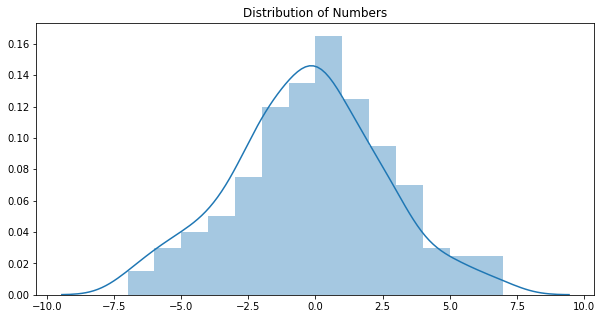

In [109]:
# Step 1: Create a discrete distribution if integers centred on zero

# Solution adapted from https://stackoverflow.com/a/37412692

# Create an array of integers from [-10, 10]
x = np.arange(-10, 11)

# The probability for selecting an element is calculated by p(-0.5 < x < 0.5) where x is a normal random variable with mean zero and standard deviation 3.
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
# normalize the probabilities so their sum is 1; because p(-10 < x < 10) is almost 1, where standard dev (scale) = 3
prob = prob / prob.sum() 

np.random.seed(2) # use random seed generator

# nums is an array of 200 integers selected from [-10, 10], selected using the defined probability
nums = pd.DataFrame(np.random.choice(x, size = 200, p = prob))

# Create a figure to visualize the distribution
plt.subplots(figsize=(10,5))

# Plot histogram of dataframe using seaborn distplot function
sns.distplot(pd.DataFrame(nums)).set_title('Distribution of Numbers')

Text(0.5, 1.0, 'Distribution of Customer ID Numbers')

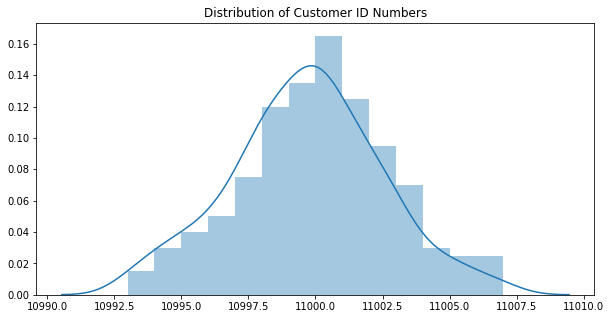

In [110]:
# Step 2: Recenter the Distribution around 5 digit integer 11000

# Convert 1D array to 2D Dataframe
nums = pd.DataFrame(nums)
# create new dataframe custid which is a 5 digit integer. The value is assigned by adding the variable nums to the integer 11000
# This gives a distribution of customer id's
custid= pd.DataFrame((11000+(nums)).astype(int))

# Create a figure to visualize the distribution
plt.subplots(figsize=(10,5))

# Plot histogram of dataframe using seaborn distplot function
sns.distplot(pd.DataFrame(custid)).set_title('Distribution of Customer ID Numbers')

In [111]:
#  Adding customer id column to the dataframe

# Combine custid series into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['cust id'] = pd.concat([custid], axis=0).reset_index().drop('index', 1)
# Display the first 5 rows of the revised dataframe
installbase.head()

,serial number,part number,install date,factory warranty,extended warranty,cust id
0,ad882c66-9c55-49dd-bed1-c34b90e86291,99256,2018-04-01,2021-03-31 17:27:36,0,11000
1,ac6d5035-90f8-4594-8ba8-939c1373b6a4,82173,2017-09-01,2020-08-31 17:27:36,3,10994
2,a29df664-590b-4793-8979-89b4fe30b2d5,54566,2018-11-01,2021-10-31 17:27:36,1,11000
3,d643eb90-e293-4cc8-9acf-e469158fab22,41019,2018-07-01,2021-06-30 17:27:36,0,11000
4,cfb26f34-5d12-40b7-aa3f-7509dab2dc71,94434,2017-12-01,2020-11-30 17:27:36,2,10999


### 3.7 Create Country Code Data

Country Code is a categorical variable and has a relationship with customer id. In this example, I assume that the customer has installed the hardware in a single country, in a single site. However, in reality it is common for customers to have multiple sites accross multiple countries. Where this happens, I assume that customers may be assigned more than one customer id. One ID per site per per country. The CRM system can link multiple customer ID's to one master customer id. The master customer ID is out of scope for this dataset. 

### ISO 2 Digit Country code
Country can be represented in many ways. I chose to use the ISO 2 Digit Country code as described in the ISO 3166 international standard. ISO country codes are used by most IT systems to simplify the identification of country names, (IBAN, 2019).

### Methodology Used to Create The Data
I assumed that customers are normally distributed, with more customers located in larger markets such as UK, France & Germany and less customers located in smaller markets such as Ireland and Portugal. To replicate a normal distribution pattern, I used the nums distribution which was already used to create customer ID's. I used the dataframe.replace function to remap the values from the nums array from a numerical value to string value and renamed the output as 'country'. 

#### Features

* Description: ISO 2 Digit Country code as described in the ISO 3166 international standard. 
* Distribution: Normal distribution.
* Relationship with other variables: Cust ID.
* Datatype: Object

In [112]:
#  Step 1: Adding country column to the dataframe using the nums series, before remapping nums in step 2.

# Combine nums series into the installbase dataframe, renaming it country, resetting the index without inserting it as a column in the new DataFrame. 
installbase['country'] = pd.concat([nums], axis=0).reset_index().drop('index', 1)
# display five sample rows of the updated dataframe
installbase.sample(5)

,serial number,part number,install date,factory warranty,extended warranty,cust id,country
180,627016a0-6e71-4172-8b65-233eec6f6b2f,38028,2018-06-01,2021-05-31 17:27:36,3,10999,-1
198,5680dcff-bec4-438f-83c9-d5ed5d236d72,53052,2017-05-01,2020-04-30 17:27:36,2,11004,4
165,96e813ae-c94b-4788-9fe0-a7c55793e0bb,26682,2018-05-01,2021-04-30 17:27:36,0,11005,5
84,c24e9174-39c5-45c2-89f8-c3579c55fad4,55002,2017-10-01,2020-09-30 17:27:36,3,11000,0
175,c8d590bc-a801-43d1-87c4-4c2f18f8f6a0,87139,2018-04-01,2021-03-31 17:27:36,1,11002,2


In [113]:
# Step 2: Use dataframe replace to replace numeric value with string value in Country column  
# Adapted from https://stackoverflow.com/a/17115229

# Define mapping between strings and number values 
mapping = {-7: "IE", -6: "PT", -5: "ES", -4: "IT",-3: "CH", -2: "AT",
                         -1: "GB", 0: "FR", 7: "NO", 6: "SE", 5: "FI", 4: "DK", 3: "NL", 2: "BE", 1: "DE"}
# create new dataframe called df2 and use df.replace to replace values in Country column using mapping 
df2 = pd.DataFrame()
df2 = installbase.replace({'country': mapping})
# display sample 5 rows showing revised dataframe incorporating the new column 'country'
df2.sample(5)


,serial number,part number,install date,factory warranty,extended warranty,cust id,country
14,ecdf8f46-7b73-48ae-be27-90b3649e1891,42031,2017-05-01,2020-04-30 17:27:36,1,10997,CH
90,75175aaf-1f01-4466-bac6-2eb7d824a1b0,58848,2019-09-01,2022-08-31 17:27:36,2,10999,GB
199,0cbc5bae-7d82-4ec8-af60-2f83cc55f520,16661,2018-01-01,2020-12-31 17:27:36,1,11002,BE
167,54beddcc-97a8-436a-b69c-29bce8df8fef,76070,2019-01-01,2021-12-31 17:27:36,3,10998,AT
100,0ba2190a-47f2-4e7e-9227-e1ca7b664541,63227,2018-08-01,2021-07-31 17:27:36,2,11002,BE


### 3.8 Service Contracts

Klaidman (2018) reported that the attachment rate for service contracts averages 67% among hardware companies in the IT Sector. The best performing companies have an attachment rate of 90%. For the purposes of this simulation, I will assume that the company has an attachment rate of 75%. 

### Methodology Used to Create The Data
I used the NumPy random.binomial function to create a distribution of the probability that a customer has purchased a service contract. I used the dataframe.replace function to remap the values from the nums array from a numerical value to string value and renamed the output as 'contract'. 

#### Features

* Description: Statement that customer has taken out a valid service contract on the unit.
* Distribution: Binomial distribution.
* Relationship with other variables: none
* Datatype: Object
* Values: [True or False]

Text(0.5, 1.0, 'Attach Rate for Service Contracts')

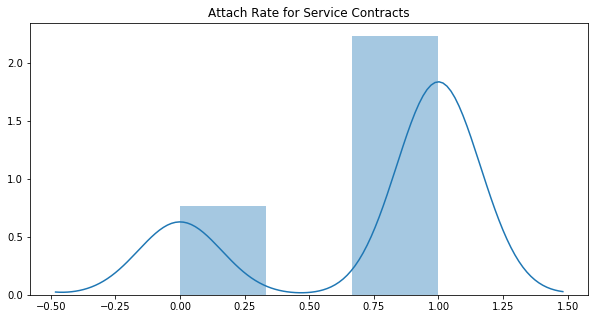

In [123]:
# 1st Step: Create a sample using the Binomial Distribution
# Adapted from https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

# Define Parameters for random.binomial() function
n = 1 # the number of elements
p = 0.75 # simulate 75% attach rate for serivce contract
size = 200 # number of records

# Create array called 'contract' using random.binomial() function and defined parameters
# Adapted from https://discuss.codecademy.com/t/what-does-the-np-random-binomial-function-return/361162
#contract = np.random.binomial(n, p, size) 
contract= pd.DataFrame(np.random.binomial(n, p, size))
# Create a figure to visualize the distribution
plt.subplots(figsize=(10,5))

# Plot histogram of dataframe using seaborn distplot function
sns.distplot(pd.DataFrame(contract)).set_title('Attach Rate for Service Contracts')


In [116]:
#  Adding contract column to the dataframe

# Combine contract series into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
# Combine nums series into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame. 
df2['contract'] = pd.concat([contract], axis=0).reset_index().drop('index', 1)
# show sample of 5 rows
df2.sample(5)

,serial number,part number,install date,factory warranty,extended warranty,cust id,country,contract
113,f1e255cd-56fa-47a2-8eaf-5625f9577d82,70661,2018-06-01,2021-05-31 17:27:36,1,11000,FR,1
17,666da91c-4979-4a17-a356-d72dd78f8ddc,51084,2017-06-01,2020-05-31 17:27:36,3,11000,FR,1
26,1bae16dc-eedb-49e4-bfdd-2f9e12b2e6bd,26639,2018-01-01,2020-12-31 17:27:36,0,10998,AT,0
178,1a08086a-ae83-46d8-aaa1-acd46d98c259,13256,2019-05-01,2022-04-30 17:27:36,2,11000,FR,1
51,d0d9d313-e810-4dda-9fab-a7b0416d82dd,63722,2017-02-01,2020-02-01 17:27:36,0,10996,IT,1


In [117]:
# Step 2: Use dataframe replace to replace numeric value with string value in contract column - 
# Adapted from https://stackoverflow.com/a/17115229

# Define mapping between strings and number values 
mapping = {0: "False", 1: "True"}
# create new dataframe called df3 and use df.replace to replace values in contract column using mapping 
df3 = pd.DataFrame()
df3 = df2.replace({'contract': mapping})
# display final dataset including new column 'contract'
df3.sample(5)

,serial number,part number,install date,factory warranty,extended warranty,cust id,country,contract
163,25621233-8445-4fa3-b945-bd5b2114f0d4,21554,2018-09-01,2021-08-31 17:27:36,1,10998,AT,True
22,b65c00c3-e044-4e44-96be-1e7521cab6cf,18170,2018-08-01,2021-07-31 17:27:36,1,10999,GB,False
171,2e779826-f8f8-4885-a56f-6595d3b45423,45885,2018-08-01,2021-07-31 17:27:36,3,11000,FR,True
43,1d35344b-4423-4b82-b583-069ea214ade7,37383,2017-11-01,2020-10-31 17:27:36,3,10999,GB,True
42,e10ddbf9-32cb-4832-8e24-babc697bf408,88216,2018-01-01,2020-12-31 17:27:36,2,11004,DK,True


In [118]:
# Display datatypes
df3.dtypes

serial number                object
part number                   int32
install date         datetime64[ns]
factory warranty     datetime64[ns]
extended warranty             int32
cust id                       int32
country                      object
contract                     object
dtype: object

## 4. References
1. Kurvinen, M (2017) *INSTALLED BASE AND TRACEABILITY* [Online] Available at: http://sd-ize.com/installed-base.html[Accessed 1 December 2019].
2. Python Software Foundation (2019) *UUID objects according to RFC 4122* [Online] Available at https://docs.python.org/2/library/uuid.html [Accessed 1 December 2019]
3. Osolnik, J (2017) *Simulating product usage data with Pandas* [Online] Available at https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d [Accessed 1 December 2019]
4. The Scipy Community (2017) *Datetimes and Timedeltas* [Online] Available at https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html [Accessed 3 December 2019]
5. Sarkar, D (2018) *Categorical Data* [Online] Available at: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63 [Accessed 21 November 2019].
6. Solomon, B (2018) *Generating Random Data in Python (Guide)* [Online] Available at: https://realpython.com/python-random/ [Accessed 7 December 2019]
7. Klaidman, S (2018) *Service Contract Attachment At Time Of Sale Is A Team Effort* [Online] Available at: https://middlesexconsulting.com/service-contract-attachment-time-sale-team-effort/ [Accessed 9 December 2019] 
8. IBAN (2019) *COUNTRY CODES ALPHA-2 & ALPHA-3* [Online] Available at: https://www.iban.com/country-codes [Accessed 30 November 2019] 
9. Ziganto, D (2018) *Simulated Datasets for Faster ML Understanding (Part 1/2)* [Online] Available at: https://dziganto.github.io/data%20science/eda/machine%20learning/python/simulated%20data/Simulated-Datasets-for-Faster-ML-Understanding/ [Accessed 1 December 2019] 
10. Brownlee, J (2019) *How to Generate Test Datasets in Python with scikit-learn* [Online] Available at: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/ [Accessed 1 December 2019] 
11. scikit-learn developers (2007-2019 *7.4. Generated datasets* [Online] Available at: https://scikit-learn.org/stable/datasets/index.html#sample-generators [Accessed 1 December 2019] 
12. McLoughlin, I (2019) *Introduction to numpy.random video* [Online] Available at: https://web.microsoftstream.com/video/ea6519e9-f7ed-444c-9b25-d855dfaa363a [Accessed 19 October 2019] 
13. Sharp Sight (2019) *NUMPY RANDOM SEED EXPLAINED* [Online] Available at: https://www.sharpsightlabs.com/blog/numpy-random-seed/  [Accessed 19 October 2019] 
14. Minitab (2019) *What are categorical, discrete, and continuous variables?* [Online] Available at: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/ [Accessed 3 November 2019] 
15. APC by Schneider Electric (2019) *AMERICAN POWER CONVERSION LIMITED FACTORY WARRANTY* [Online] Available at: https://download.schneider-electric.com/files?p_Doc_Ref=SPD_CFOT-7PVJLF_EN [Accessed 9 December 2019] 
16. Onlinecoursetutorials.com (2019) *Numpy Tutorial* [Online] Available at: https://onlinecoursetutorials.com/numpy/ [Accessed 2 November 2019].
17. Chen, J (2019) *What is Uniform Distribution?* [Online] Available at: https://www.investopedia.com/terms/u/uniform-distribution.asp [Accessed 5 November 2019].
18. Ayhan (2016) *how-to-generate-a-random-normal-distribution-of-integers* [Online] Available at: https://stackoverflow.com/a/37412692 [Accessed 1 December 2019].


